In [2]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Create a data frame.
learning_progress = pd.DataFrame()

# Add a range of 100 dates starting Jan 1, 2017.
learning_progress['date'] = pd.date_range(start='2017-01-01', periods=100)

# Add linearly increasing knowledge and oscillating confidence.
learning_progress['knowledge'] = np.arange(0, 100)
learning_progress['confidence'] = 10 * np.cos(np.arange(0, 100) * np.pi / 3.5) + np.arange(0, 100)

In [4]:
from sklearn import linear_model
lm = linear_model.LinearRegression()

# Note that for sklearn we must convert our data to numeric.
X = pd.DataFrame(pd.to_numeric(learning_progress['date']))
Y = learning_progress['confidence']
lm.fit(X, Y)
lm.score(X, Y)

0.9434054498353532

In [5]:
lm.coef_[0]

1.161624877097711e-14

In [6]:
lm.coef_[0] * 1000000000 * 24 * 60 * 60

1.0036438938124224

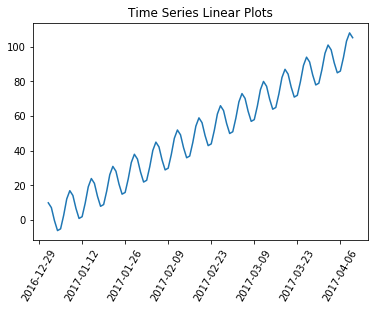

In [7]:
plt.plot(learning_progress.date, learning_progress.confidence)
plt.xticks(rotation=60)
plt.title('Time Series Linear Plots')
plt.show()

In [8]:
learning_progress['day_of_week'] = learning_progress.date.apply(
    lambda x: str(dt.datetime.weekday(x)))

In [9]:
X = pd.get_dummies(learning_progress.day_of_week)
X['date'] = pd.to_numeric(learning_progress.date) / (1000000000 * 24 * 60 * 60)
Y = learning_progress['confidence']
lm.fit(X, Y)
lm.score(X, Y)

1.0

In [10]:
print(X.columns)
print(lm.coef_)

Index(['0', '1', '2', '3', '4', '5', '6', 'date'], dtype='object')
[ 6.23489802 -2.22520934 -9.00968868 -9.00968868 -2.22520934  6.23489802
 10.          1.        ]


Text(0.5,1,'Cosine Function')

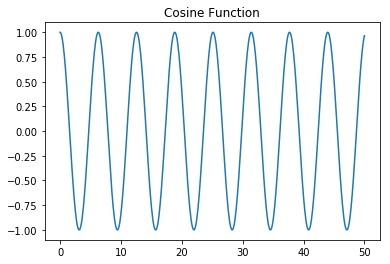

In [11]:
x = np.linspace(0, 50, 500)
plt.plot(x, np.cos(x))
plt.title('Cosine Function')

In [12]:
X = pd.DataFrame()
X['date'] = pd.to_numeric(learning_progress.date) / (1000000000 * 24 * 60 * 60)

# Note that we're subtracting 17167 from date.
# This is to normalize it so that it starts at zero.
# This aligns the peak of the curve with the start of the cosine function.

X['cos_date'] = np.cos((X.date - 17167) * np.pi / 3.5)
Y = learning_progress['confidence']
lm.fit(X, Y)
lm.score(X, Y)

1.0

In [13]:
lm.coef_

array([ 1., 10.])

In [14]:
x_ar = [15]
for i in range(1000):
    y = 5 + .7*x_ar[i-1] 
    x_ar.append(float(y))

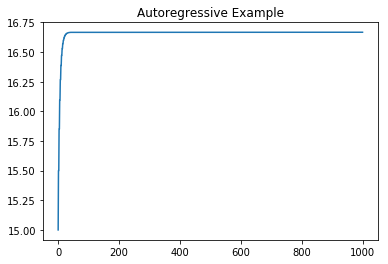

In [15]:
plt.plot(x_ar)
plt.title('Autoregressive Example')
plt.show()

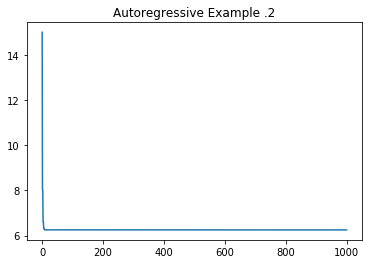

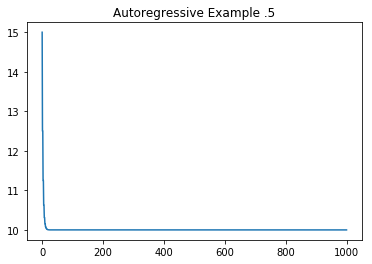

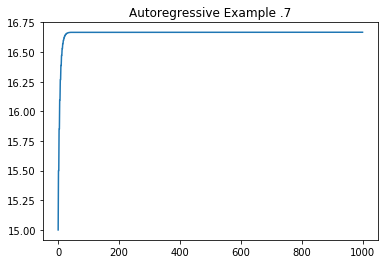

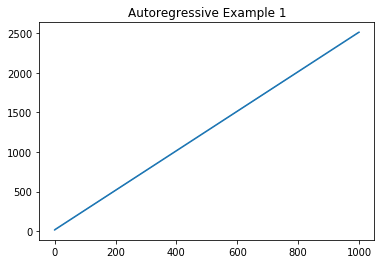

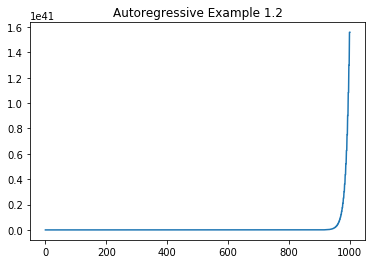

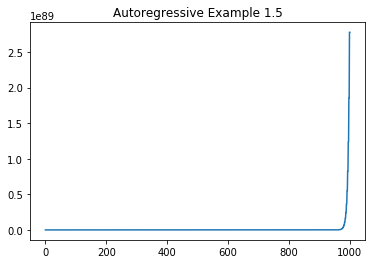

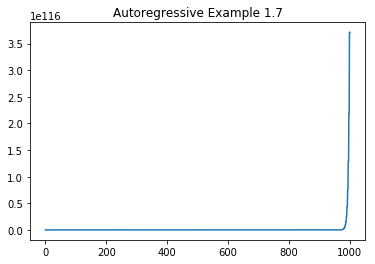

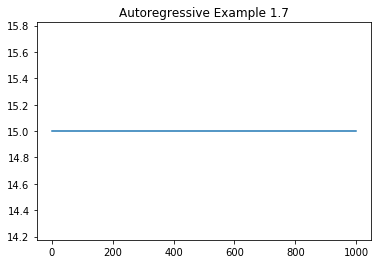

In [16]:
x_ar = [15]
for i in range(1000):
    y = 5 + .2*x_ar[i-1] 
    x_ar.append(float(y))
plt.plot(x_ar)
plt.title('Autoregressive Example .2')
plt.show()
x_ar = [15]
for i in range(1000):
    y = 5 + .5*x_ar[i-1] 
    x_ar.append(float(y))
plt.plot(x_ar)
plt.title('Autoregressive Example .5')
plt.show()   
x_ar = [15]
for i in range(1000):
    y = 5 + .7*x_ar[i-1] 
    x_ar.append(float(y))
plt.plot(x_ar)
plt.title('Autoregressive Example .7')
plt.show()   
x_ar = [15]
for i in range(1000):
    y = 5 + x_ar[i-1] 
    x_ar.append(float(y))
plt.plot(x_ar)
plt.title('Autoregressive Example 1')
plt.show()   
x_ar = [15]
for i in range(1000):
    y = 5 + 1.2*x_ar[i-1] 
    x_ar.append(float(y))
plt.plot(x_ar)
plt.title('Autoregressive Example 1.2')
plt.show()
x_ar = [15]
for i in range(1000):
    y = 5 + 1.5*x_ar[i-1] 
    x_ar.append(float(y))
plt.plot(x_ar)
plt.title('Autoregressive Example 1.5')
plt.show() 
x_ar = [15]
for i in range(1000):
    y = 5 + 1.7*x_ar[i-1] 
    x_ar.append(float(y))
plt.plot(x_ar)
plt.title('Autoregressive Example 1.7')
plt.show()   
x_ar = [15]
for i in range(1000):
    y = x_ar[i-1] 
    x_ar.append(float(y))
plt.plot(x_ar)
plt.title('Autoregressive Example 1.7')
plt.show()   

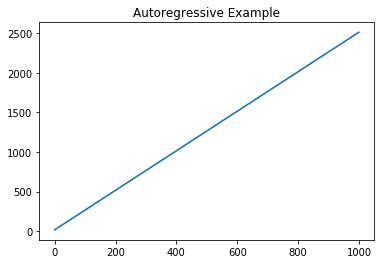

In [17]:
x_ar = [15]

for i in range(1000):
    y = 5 + x_ar[i-1] 
    x_ar.append(float(y))
plt.plot(x_ar)
plt.title('Autoregressive Example')
plt.show()    

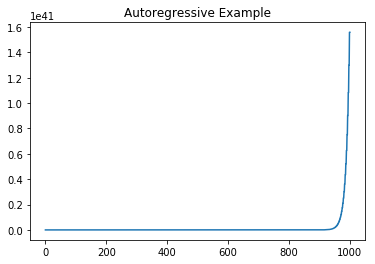

In [18]:
x_ar = [15]

for i in range(1000):
    y = 5 + 1.2*x_ar[i-1] 
    x_ar.append(float(y))
plt.plot(x_ar)
plt.title('Autoregressive Example')
plt.show()    

In [25]:
x_ma = [15]
e_t = 0
for i in range(500):
    e = np.random.randn(1)
    y = 5 + .1*e_t + e
    x_ma.append(float(y))
    e_t=e
    

In [26]:
print(e_t)

[2.96511926]


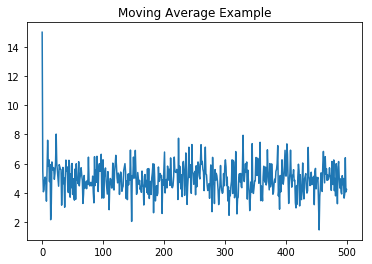

In [21]:
plt.plot(x_ma)
plt.title('Moving Average Example')
plt.show()

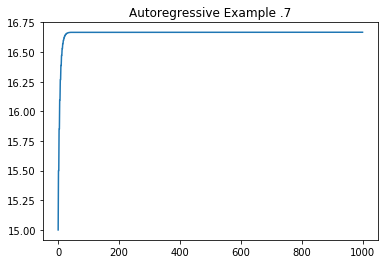

In [22]:
x_ar = [15]
for i in range(1000):
    y = 5 + .7*x_ar[i-1] 
    x_ar.append(float(y))
plt.plot(x_ar)
plt.title('Autoregressive Example .7')
plt.show()   

Text(0.5,1,'AR(1) PACF')

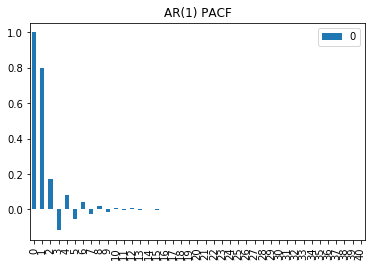

In [23]:
from statsmodels.tsa.stattools import acf, pacf
x_acf = pd.DataFrame(pacf(x_ar))
x_acf.plot(kind='bar')
plt.title("AR(1) PACF")

Text(0.5,1,'MA(1) PACF')

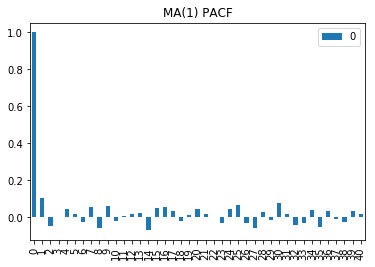

In [24]:
x_acf = pd.DataFrame(pacf(x_ma))
x_acf.plot(kind='bar')
plt.title('MA(1) PACF')